<a href="https://colab.research.google.com/github/Sri-03/VITON/blob/main/Virtual%20Top%20Try%20On.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT THE MODEL AND INSTALL ALL THE REQUIRED LIBRARIES**

In [6]:
!pwd
# Here we import the main GITHUB repository
!git clone https://github.com/Deepak-D-Gowda/ACGPN
%cd ACGPN
!pip install ninja
import gdown
import numpy as np
from PIL import Image
import IPython
import os
import sys

from predict_pose import generate_pose_keypoints
!mkdir Data_preprocessing/test_color
!mkdir Data_preprocessing/test_colormask
!mkdir Data_preprocessing/test_edge
!mkdir Data_preprocessing/test_img
!mkdir Data_preprocessing/test_label
!mkdir Data_preprocessing/test_mask
!mkdir Data_preprocessing/test_pose
!mkdir inputs
!mkdir inputs/img
!mkdir inputs/cloth
%cd pose
!gdown --id 1IMoLEcTGO3wBQkt3h7XSSZ99E7rfsJVp
%cd ..
!git clone https://github.com/Deepak-D-Gowda/Self-Correction-Human-Parsing-for-ACGPN
!git clone https://github.com/Deepak-D-Gowda/U-2-Net
#for segmentation mask generation
url = 'https://drive.google.com/uc?id=1IZaTLTCV6PP63TGhrW6ZUm0Z-aCq5Rsi'
output = 'lip_final.pth'
gdown.download(url, output, quiet=False)
%cd U-2-Net
!mkdir saved_models
!mkdir saved_models/u2net
!mkdir saved_models/u2netp
!gdown --id 1InAEi6jTvvZ_VMOcSpgVaTKRmUfQiOi3 -O saved_models/u2netp/u2netp.pth
!gdown --id 1Ifr74yn9en-GT6b0RhT3kDM5oOsbKY99 -O saved_models/u2net/u2net.pth
import u2net_load
import u2net_run
u2net = u2net_load.model(model_name = 'u2netp')
%cd ..
!mkdir checkpoints
gdown.download('https://drive.google.com/uc?id=1J2IzVAmtI4PfSx56Ow81YMfqVZUrMesf',output='checkpoints/ACGPN_checkpoints.zip', quiet=False)
%cd checkpoints
!unzip ACGPN_checkpoints
%cd ..

/ACGPN
Cloning into 'ACGPN'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (174/174), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 174 (delta 59), reused 75 (delta 2), pack-reused 0
Receiving objects: 100% (174/174), 307.48 KiB | 13.98 MiB/s, done.
Resolving deltas: 100% (59/59), done.
/ACGPN/ACGPN
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/ACGPN/ACGPN/pose
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1IMoLEcTGO3wBQkt3h7XSSZ99E7rfsJVp
To: /ACGPN/ACGPN/pose/pose_iter_440000.caffemodel
100% 209M/209M [00:00<00:00, 247MB/s]
/ACGPN/ACGPN
Cloning into 'Self-Correction-Human-Parsing-for-ACGPN'...
remote: Enumerating objects: 638, done.
remote: Counting objects: 100

Downloading...
From: https://drive.google.com/uc?id=1IZaTLTCV6PP63TGhrW6ZUm0Z-aCq5Rsi
To: /ACGPN/ACGPN/lip_final.pth
100%|██████████| 267M/267M [00:01<00:00, 242MB/s]


/ACGPN/ACGPN/U-2-Net
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1InAEi6jTvvZ_VMOcSpgVaTKRmUfQiOi3
To: /ACGPN/ACGPN/U-2-Net/saved_models/u2netp/u2netp.pth
100% 4.68M/4.68M [00:00<00:00, 299MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Ifr74yn9en-GT6b0RhT3kDM5oOsbKY99
To: /ACGPN/ACGPN/U-2-Net/saved_models/u2net/u2net.pth
100% 176M/176M [00:00<00:00, 275MB/s]
...load U2NEP---4.7 MB
/ACGPN/ACGPN


Downloading...
From: https://drive.google.com/uc?id=1J2IzVAmtI4PfSx56Ow81YMfqVZUrMesf
To: /ACGPN/ACGPN/checkpoints/ACGPN_checkpoints.zip
100%|██████████| 524M/524M [00:09<00:00, 55.4MB/s]


/ACGPN/ACGPN/checkpoints
Archive:  ACGPN_checkpoints.zip
   creating: label2city/
  inflating: label2city/latest_net_G.pth  
  inflating: label2city/latest_net_G1.pth  
  inflating: label2city/latest_net_G2.pth  
  inflating: label2city/latest_net_U.pth  
  inflating: label2city/opt.txt      
/ACGPN/ACGPN




# **UPLOAD CLOTH IMAGE HERE (SELECT FILE OF THE CLOTH IT SHOULD BE A TOP AND IT SHOULD BE IN .JPG FORMAT)** 

In [7]:
%cd inputs/cloth
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

/ACGPN/ACGPN/inputs/cloth


Saving 000077_1.jpg to 000077_1.jpg
/ACGPN/ACGPN/inputs
/ACGPN/ACGPN


# **UPLOAD PERSON IMAGE HERE (SELECT FILE OF REFERENCE IMAGE THAT SHOULD BE IN .JPG FORMAT)**

In [8]:
%cd inputs/img
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

/ACGPN/ACGPN/inputs/img


Saving 000061_0.jpg to 000061_0.jpg
/ACGPN/ACGPN/inputs
/ACGPN/ACGPN


# **LIVE CAMERA CAPTURING** (*CLICK ON CPATURE BUTTON TO CAPTURE YOUR IMAGE*)

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='/content/ACGPN/inputs/img/photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

  from IPython.display import Image
try: 
  filename = take_photo() 
  print('Saved to{}'.format(filename )) 
   
   
  display (Image(filename )) 
except Exception as err: 
   #Errors be thrown if the user does not have a webcam or if they do not 
   #grant the page permission to access it. 
   print(str(err))

   

  

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

# **RUN THE MODEL**

Generating mask for: 000001_1.png
Saving output at Data_preprocessing/test_edge/000001_1.png
Resized image in 0.011523008346557617s
100% 1/1 [00:00<00:00,  1.89it/s]
Parsing generated in 81.86004662513733s
File saved at Data_preprocessing/test_pose/000001_0_keypoints.json
Pose map generated in 5.190011501312256s
?
------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
cluster_path: features_clustered_010.npy
continue_train: False
data_type: 32
datapairs: test_pairs.txt
dataroot: Data_preprocessing/
display_winsize: 512
engine: None
export_onnx: None
fineSize: 512
gpu_ids: [0]
how_many: 1000
input_nc: 3
isTrain: False
label_nc: 20
loadSize: 512
max_dataset_size: inf
model: pix2pixHD
nThreads: 1
n_blocks_global: 4
n_blocks_local: 3
n_downsample_global: 4
n_local_enhancers: 1
name: label2city
netG: global
ngf: 64
niter_fix_global: 0
no_flip: False
norm: instance
ntest: inf
onnx: None
output_nc: 3
phase: test
resize_or_crop: scale_width
results_dir

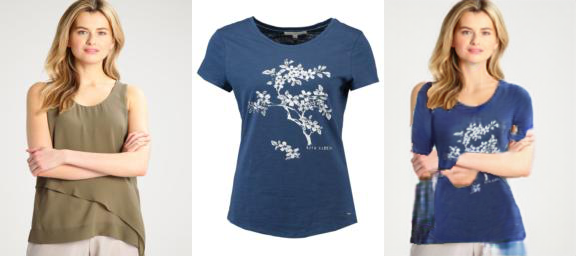

In [9]:
sorted(os.listdir('inputs/cloth'))
from PIL import Image
cloth_name = '000001_1.png'
cloth_path = os.path.join('inputs/cloth', sorted(os.listdir('inputs/cloth'))[0])
cloth = Image.open(cloth_path)
cloth = cloth.resize((192, 256), Image.BICUBIC).convert('RGB')
cloth.save(os.path.join('Data_preprocessing/test_color', cloth_name))

u2net_run.infer(u2net, 'Data_preprocessing/test_color', 'Data_preprocessing/test_edge')
os.listdir('inputs/img') 

import time

start_time = time.time()
img_name = '000001_0.png'
img_path = os.path.join('inputs/img', sorted(os.listdir('inputs/img'))[0])
img = Image.open(img_path)
img = img.resize((192,256), Image.BICUBIC)

img_path = os.path.join('Data_preprocessing/test_img', img_name)
img.save(img_path)
resize_time = time.time()
print('Resized image in {}s'.format(resize_time-start_time))

!python3 Self-Correction-Human-Parsing-for-ACGPN/simple_extractor.py --dataset 'lip' --model-restore 'lip_final.pth' --input-dir 'Data_preprocessing/test_img' --output-dir 'Data_preprocessing/test_label'
parse_time = time.time()
print('Parsing generated in {}s'.format(parse_time-resize_time))

pose_path = os.path.join('Data_preprocessing/test_pose', img_name.replace('.png', '_keypoints.json'))
generate_pose_keypoints(img_path, pose_path)
pose_time = time.time()
print('Pose map generated in {}s'.format(pose_time-parse_time)) 
!rm -rf Data_preprocessing/test_pairs.txt
with open('Data_preprocessing/test_pairs.txt','w') as f:
    f.write('000001_0.png 000001_1.png')   
!python test.py

# Here is a Sample Output of the Model 

output_grid = np.concatenate([np.array(Image.open('Data_preprocessing/test_img/000001_0.png')),
                np.array(Image.open('Data_preprocessing/test_color/000001_1.png')),
                np.array(Image.open('results/test/try-on/000001_0.png'))], axis=1)
image_grid = Image.fromarray(output_grid)
image_grid

In [4]:
!pwd
!rm -rf Data_preprocessing/test_color/*
!rm -rf Data_preprocessing/test_colormask/*
!rm -rf Data_preprocessing/test_edge/*
!rm -rf Data_preprocessing/test_img/*
!rm -rf Data_preprocessing/test_label/*
!rm -rf Data_preprocessing/test_mask/*
!rm -rf Data_preprocessing/test_pose/*
!rm -rf inputs/cloth/*
!rm -rf inputs/img/*
!rm -rf results/*
%cd /content/ACGPN

/
[Errno 2] No such file or directory: '/content/ACGPN'
/
